In [1]:
import pandas as pd
import FinanceDataReader as fdr

In [3]:
stock_dict = {
    '대우조선해양': '042660',
    '삼성중공업': '010140',
    '한국조선해양': '009540',
    'STX중공업': '071970',
    '현대중공업': '329180',
    '현대미포조선': '010620',
    '한라IMS': '092460',
    '세진중공업': '075580'}
stock_dict

{'대우조선해양': '042660',
 '삼성중공업': '010140',
 '한국조선해양': '009540',
 'STX중공업': '071970',
 '현대중공업': '329180',
 '현대미포조선': '010620',
 '한라IMS': '092460',
 '세진중공업': '075580'}

In [4]:
type(stock_dict)

dict

In [5]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, '2022', '2023')['Close']
    item_list.append(close)

In [6]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,대우조선해양,삼성중공업,한국조선해양,STX중공업,현대중공업,현대미포조선,한라IMS,세진중공업
Date,,,,,,,,
2022-01-03,22950,5680,94000,4700,97600,70000,5200,5950
2022-01-04,23550,5740,98700,4880,101500,76100,5440,6150
2022-01-05,23600,5780,98400,5330,104000,79800,5510,6320
2022-01-06,24900,5880,102000,5310,111000,81800,5590,6210
2022-01-07,25200,5880,100500,5390,112000,82400,5640,6480
...,...,...,...,...,...,...,...,...
2022-12-23,18900,5150,72100,6530,120500,85300,5750,5350
2022-12-26,18500,5090,72000,6990,120000,84100,5690,5270
2022-12-27,18800,5180,73500,7080,121000,85500,5780,5460


### 시각화를 위한 폰트 설정

In [7]:
def get_font_family():
    """ 
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [8]:
get_font_family()

'Malgun Gothic'

In [9]:
# 시각화를 위한 폰트설정

import matplotlib.pyplot as plt
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\jukim\AppData\Local\Temp\ipykernel_4704\3058003495.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


<AxesSubplot:title={'center':'한글'}>

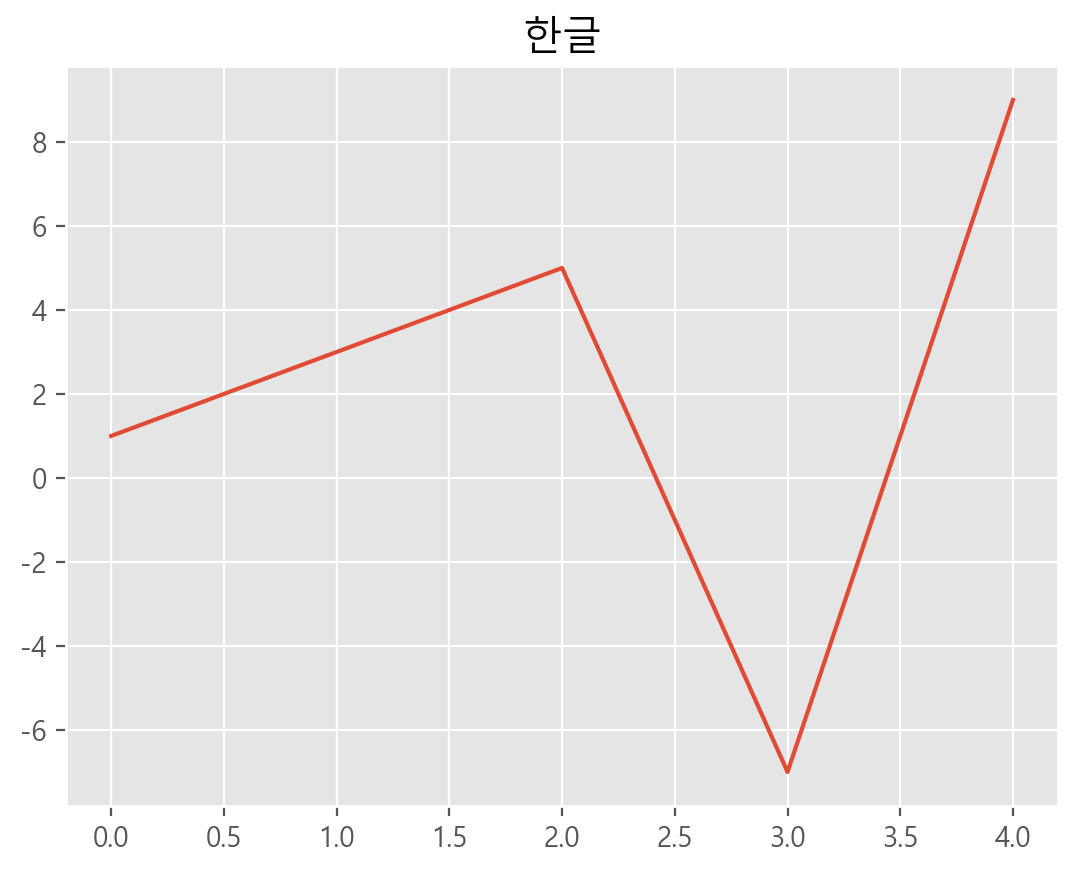

In [10]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title='한글')

<AxesSubplot:xlabel='Date'>

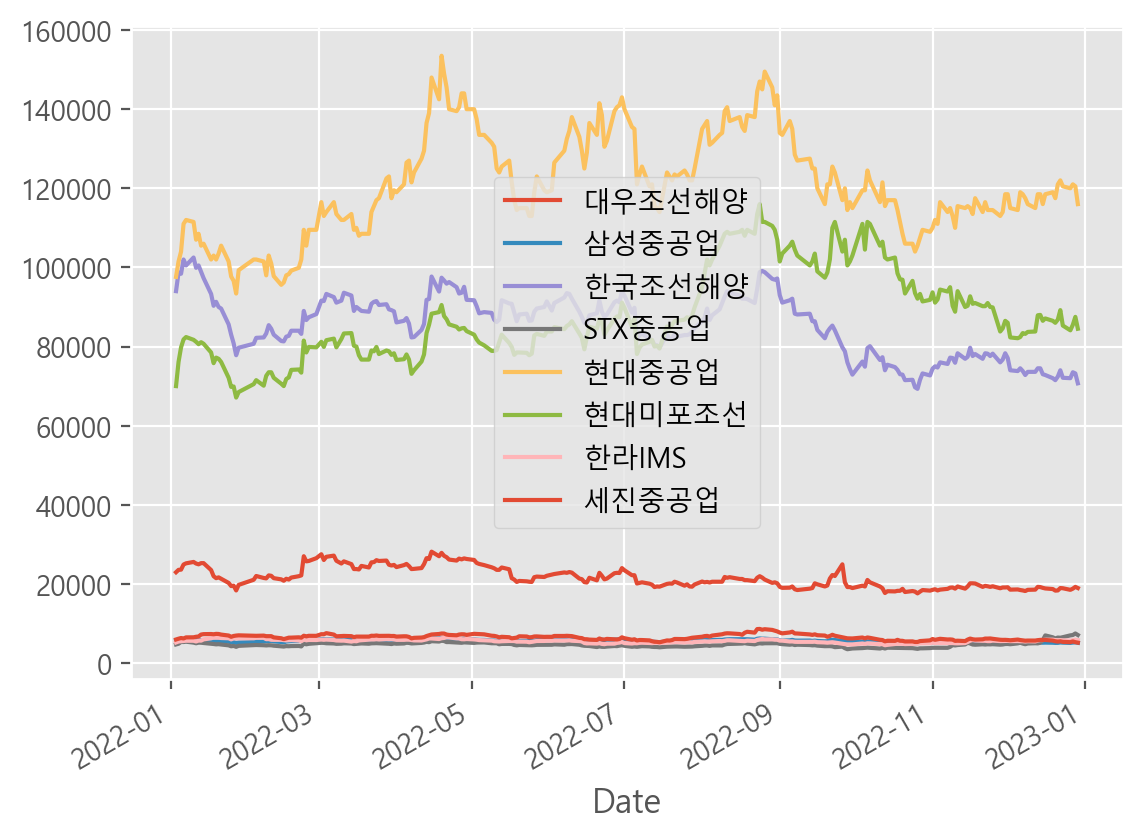

In [11]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

<AxesSubplot:xlabel='Date'>

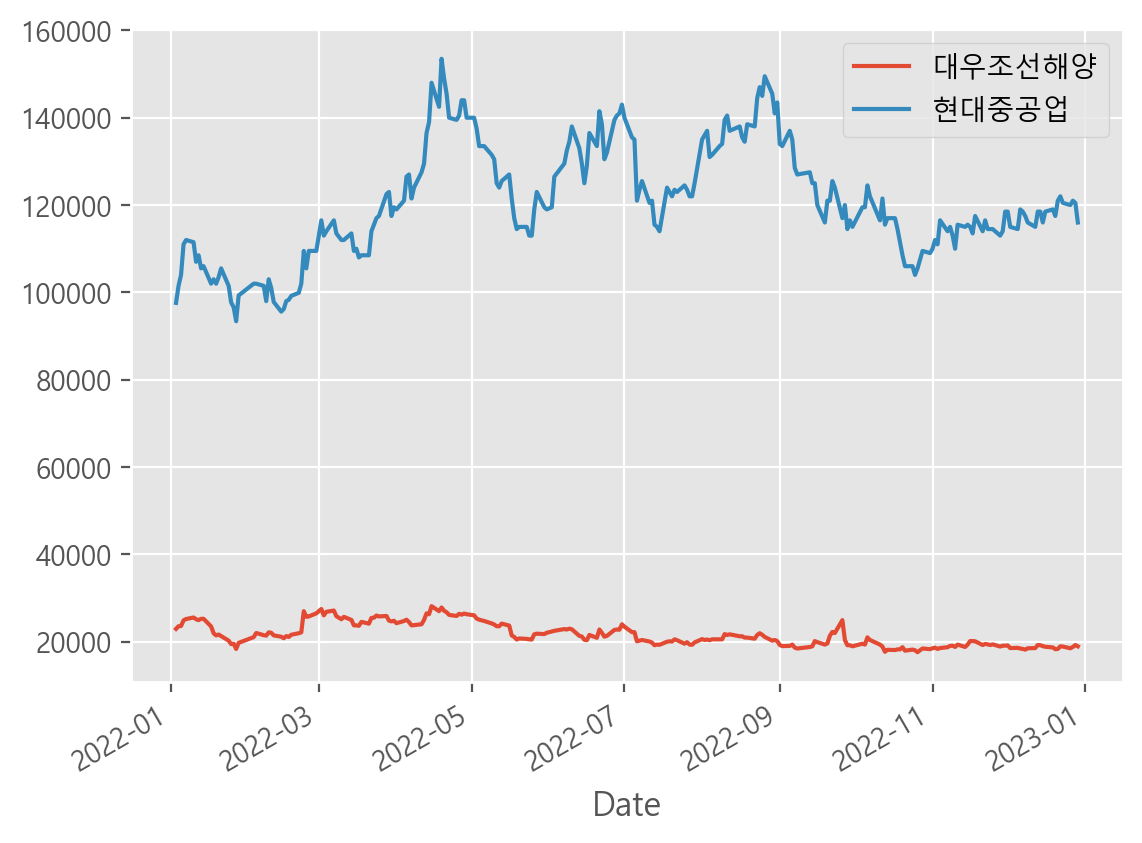

In [12]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[['대우조선해양', '현대중공업']].plot()

<AxesSubplot:xlabel='Date'>

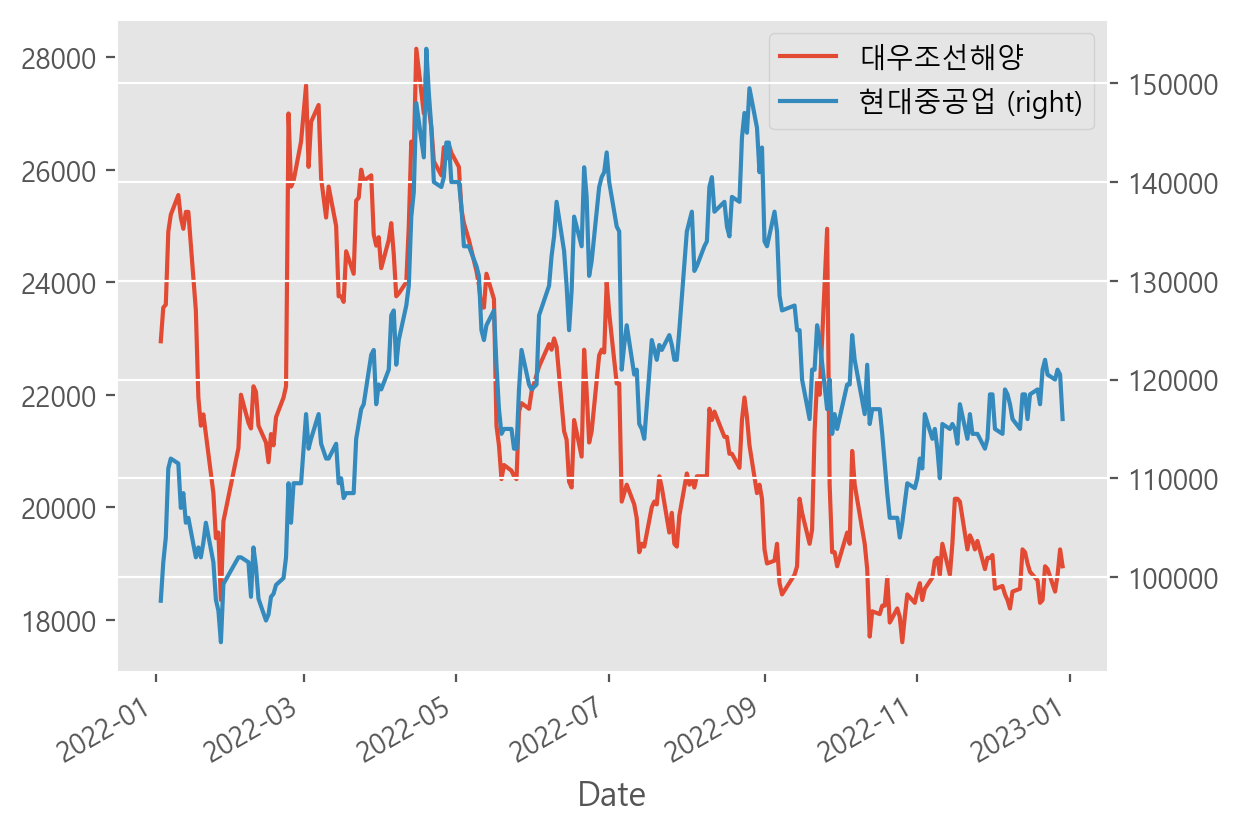

In [13]:
# secondary_y를 사용해 2축 그래프 그리기
df[['대우조선해양', '현대중공업']].plot(secondary_y='현대중공업')

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [17]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[['대우조선해양', '현대중공업']]
df_plot = (df2 / df2.iloc[0] - 1)*100

<AxesSubplot:xlabel='Date'>

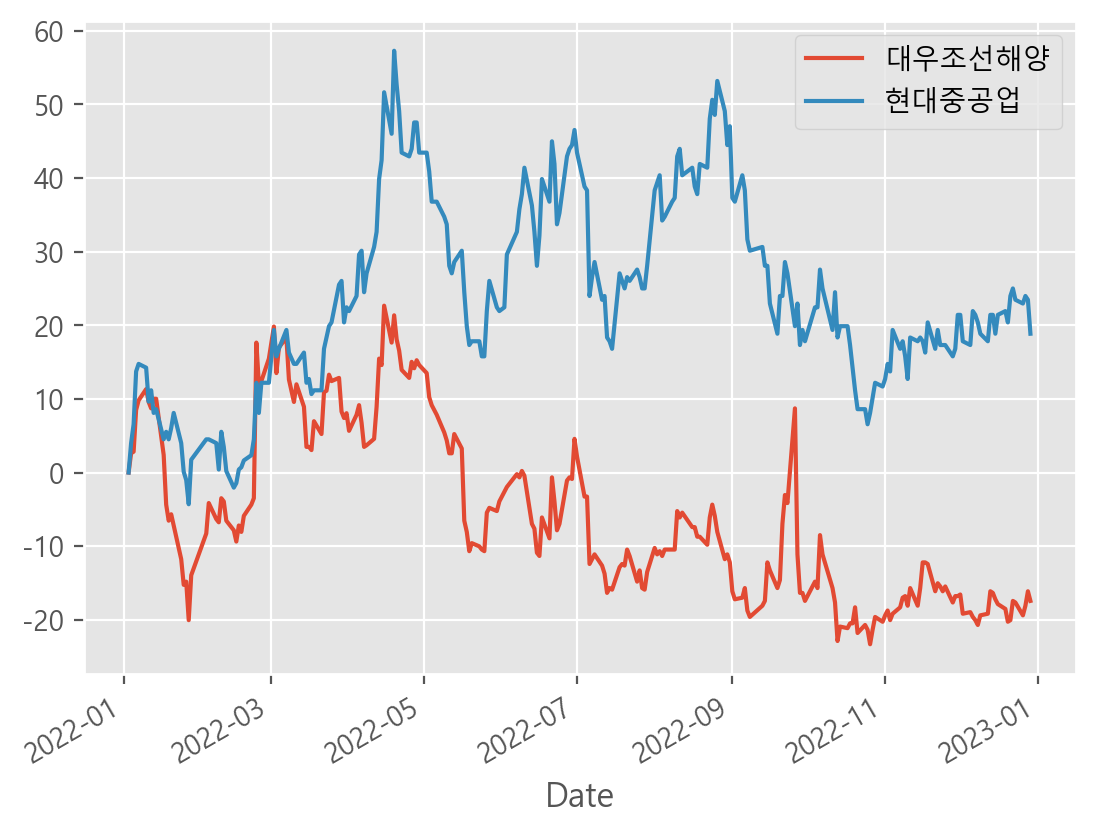

In [18]:
# 수익률 시각화 하기
df_plot.plot()

<AxesSubplot:title={'center':'수익률 그래프'}, xlabel='Date'>

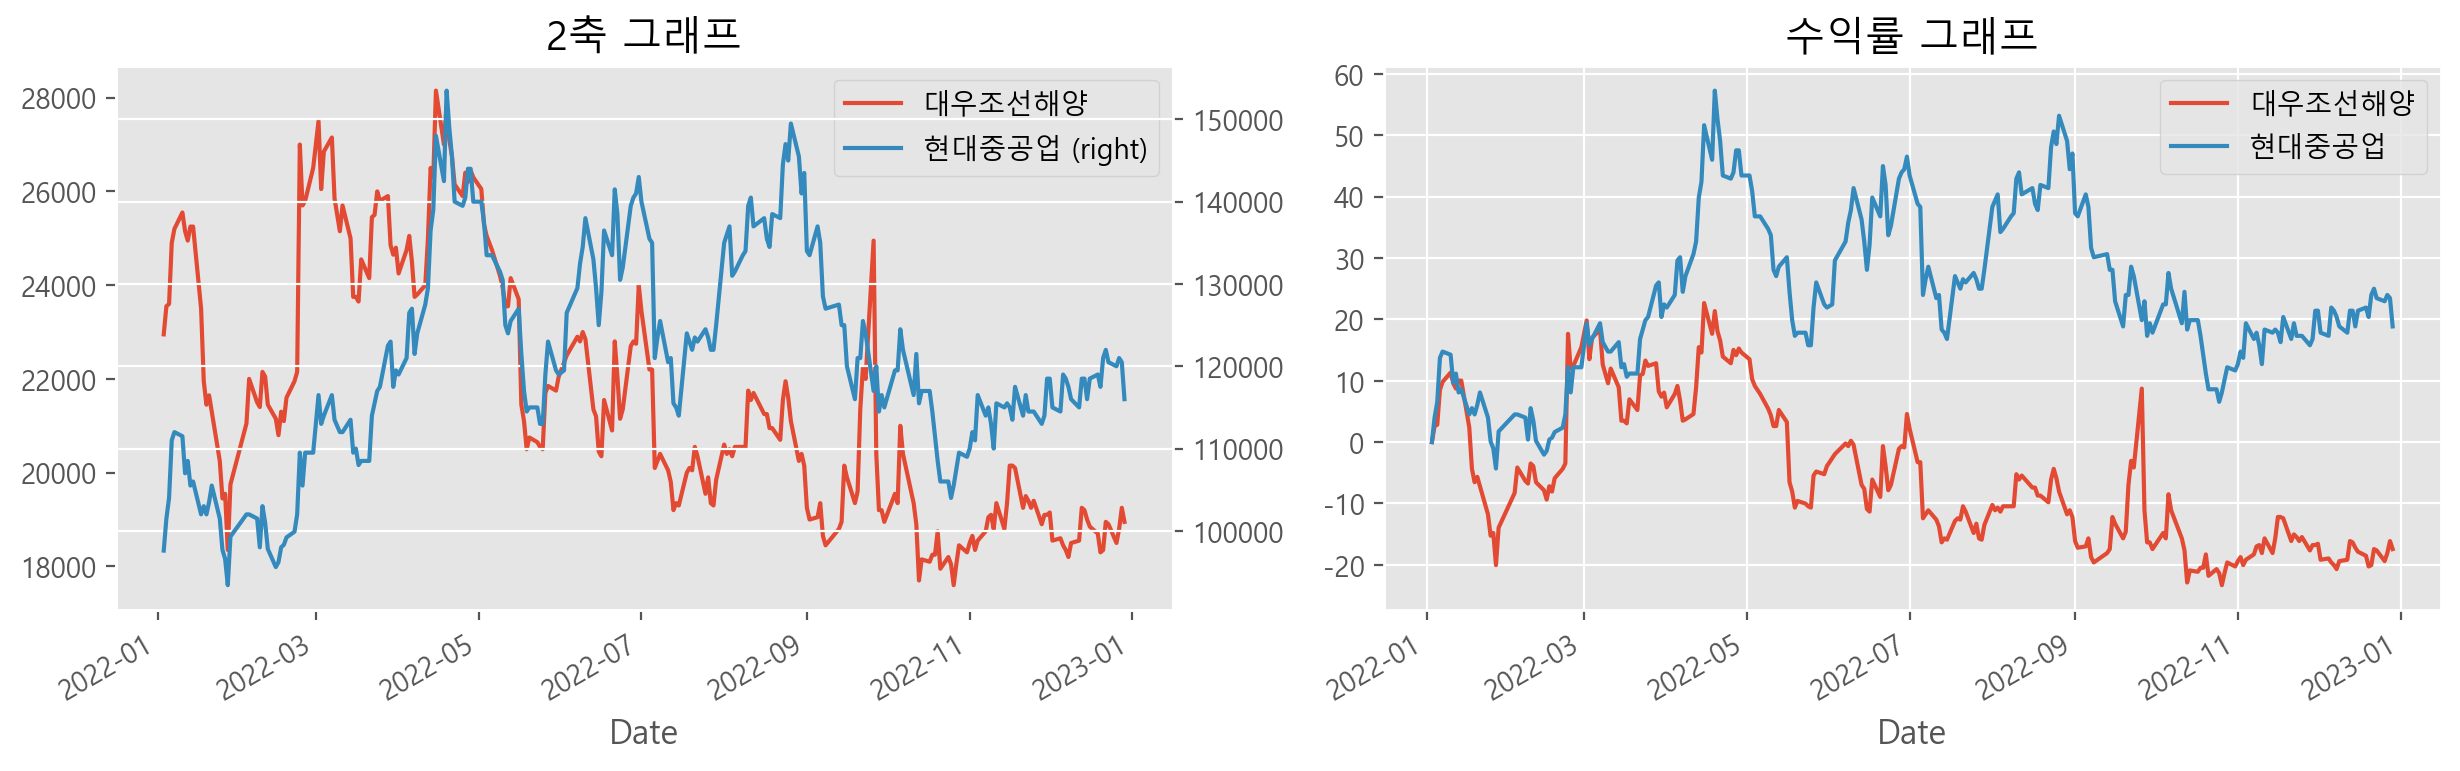

In [19]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
df[['대우조선해양', '현대중공업']].plot(secondary_y='현대중공업', ax=axes[0], title='2축 그래프')
df_plot.plot(ax=axes[1], title='수익률 그래프')

In [20]:
df_norm = (df / df.iloc[0] - 1)*100
df_norm

,대우조선해양,삼성중공업,한국조선해양,STX중공업,현대중공업,현대미포조선,한라IMS,세진중공업
Date,,,,,,,,
2022-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-04,2.614379,1.056338,5.000000,3.829787,3.995902,8.714286,4.615385,3.361345
2022-01-05,2.832244,1.760563,4.680851,13.404255,6.557377,14.000000,5.961538,6.218487
2022-01-06,8.496732,3.521127,8.510638,12.978723,13.729508,16.857143,7.500000,4.369748
2022-01-07,9.803922,3.521127,6.914894,14.680851,14.754098,17.714286,8.461538,8.907563
...,...,...,...,...,...,...,...,...
2022-12-23,-17.647059,-9.330986,-23.297872,38.936170,23.463115,21.857143,10.576923,-10.084034
2022-12-26,-19.389978,-10.387324,-23.404255,48.723404,22.950820,20.142857,9.423077,-11.428571
2022-12-27,-18.082789,-8.802817,-21.808511,50.638298,23.975410,22.142857,11.153846,-8.235294


<AxesSubplot:xlabel='Date'>

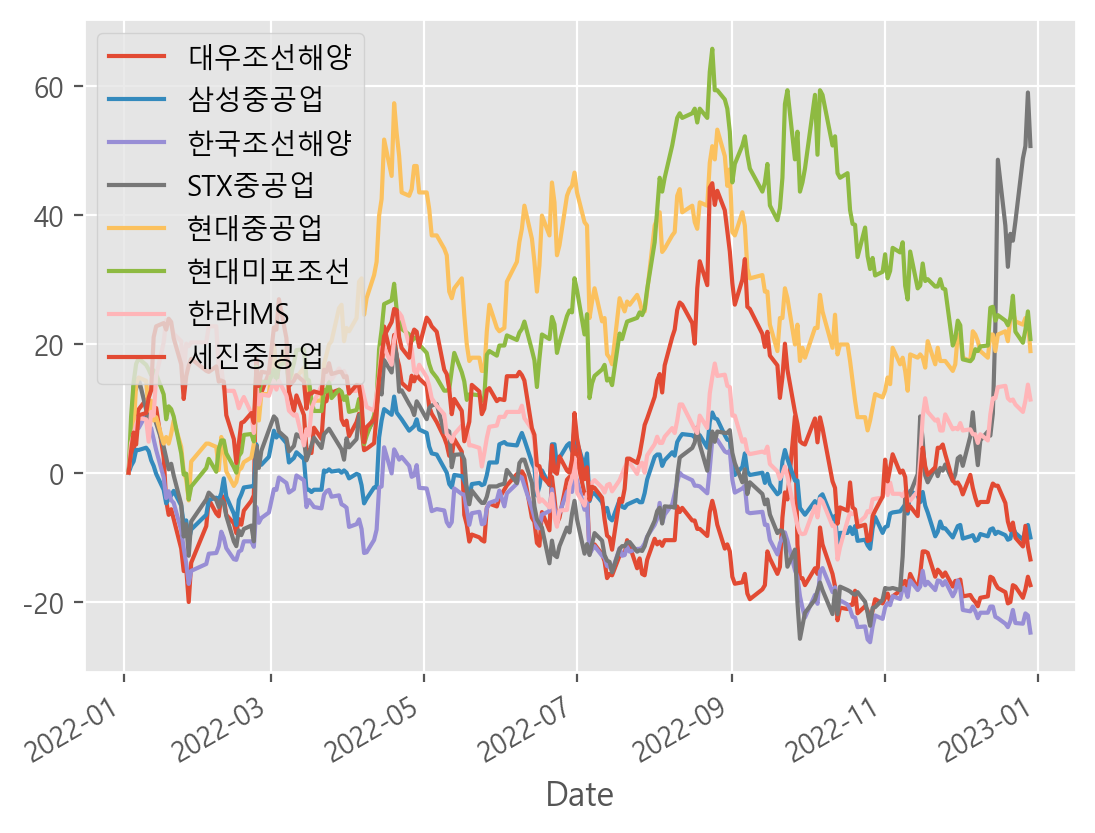

In [21]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot()

In [22]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,대우조선해양,삼성중공업,한국조선해양,STX중공업,현대중공업,현대미포조선,한라IMS,세진중공업
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,-5.994828,-1.629595,-9.289915,-0.569538,23.771741,25.041812,6.524390,9.519710
std,11.576353,5.489964,8.276524,13.429743,13.132772,15.706749,8.207495,11.752354
min,-23.311547,-11.795775,-26.276596,-25.744681,-4.303279,-4.142857,-13.461538,-13.445378
25%,-15.904139,-5.985915,-16.702128,-9.601064,15.778689,14.142857,-0.144231,0.000000
50%,-8.387800,-1.936620,-8.031915,-0.425532,21.926230,21.357143,6.923077,9.327731
75%,3.213508,2.772887,-2.898936,5.957447,33.452869,33.392857,12.115385,16.344538
max,22.657952,11.795775,9.042553,58.936170,57.274590,65.714286,24.807692,44.873950


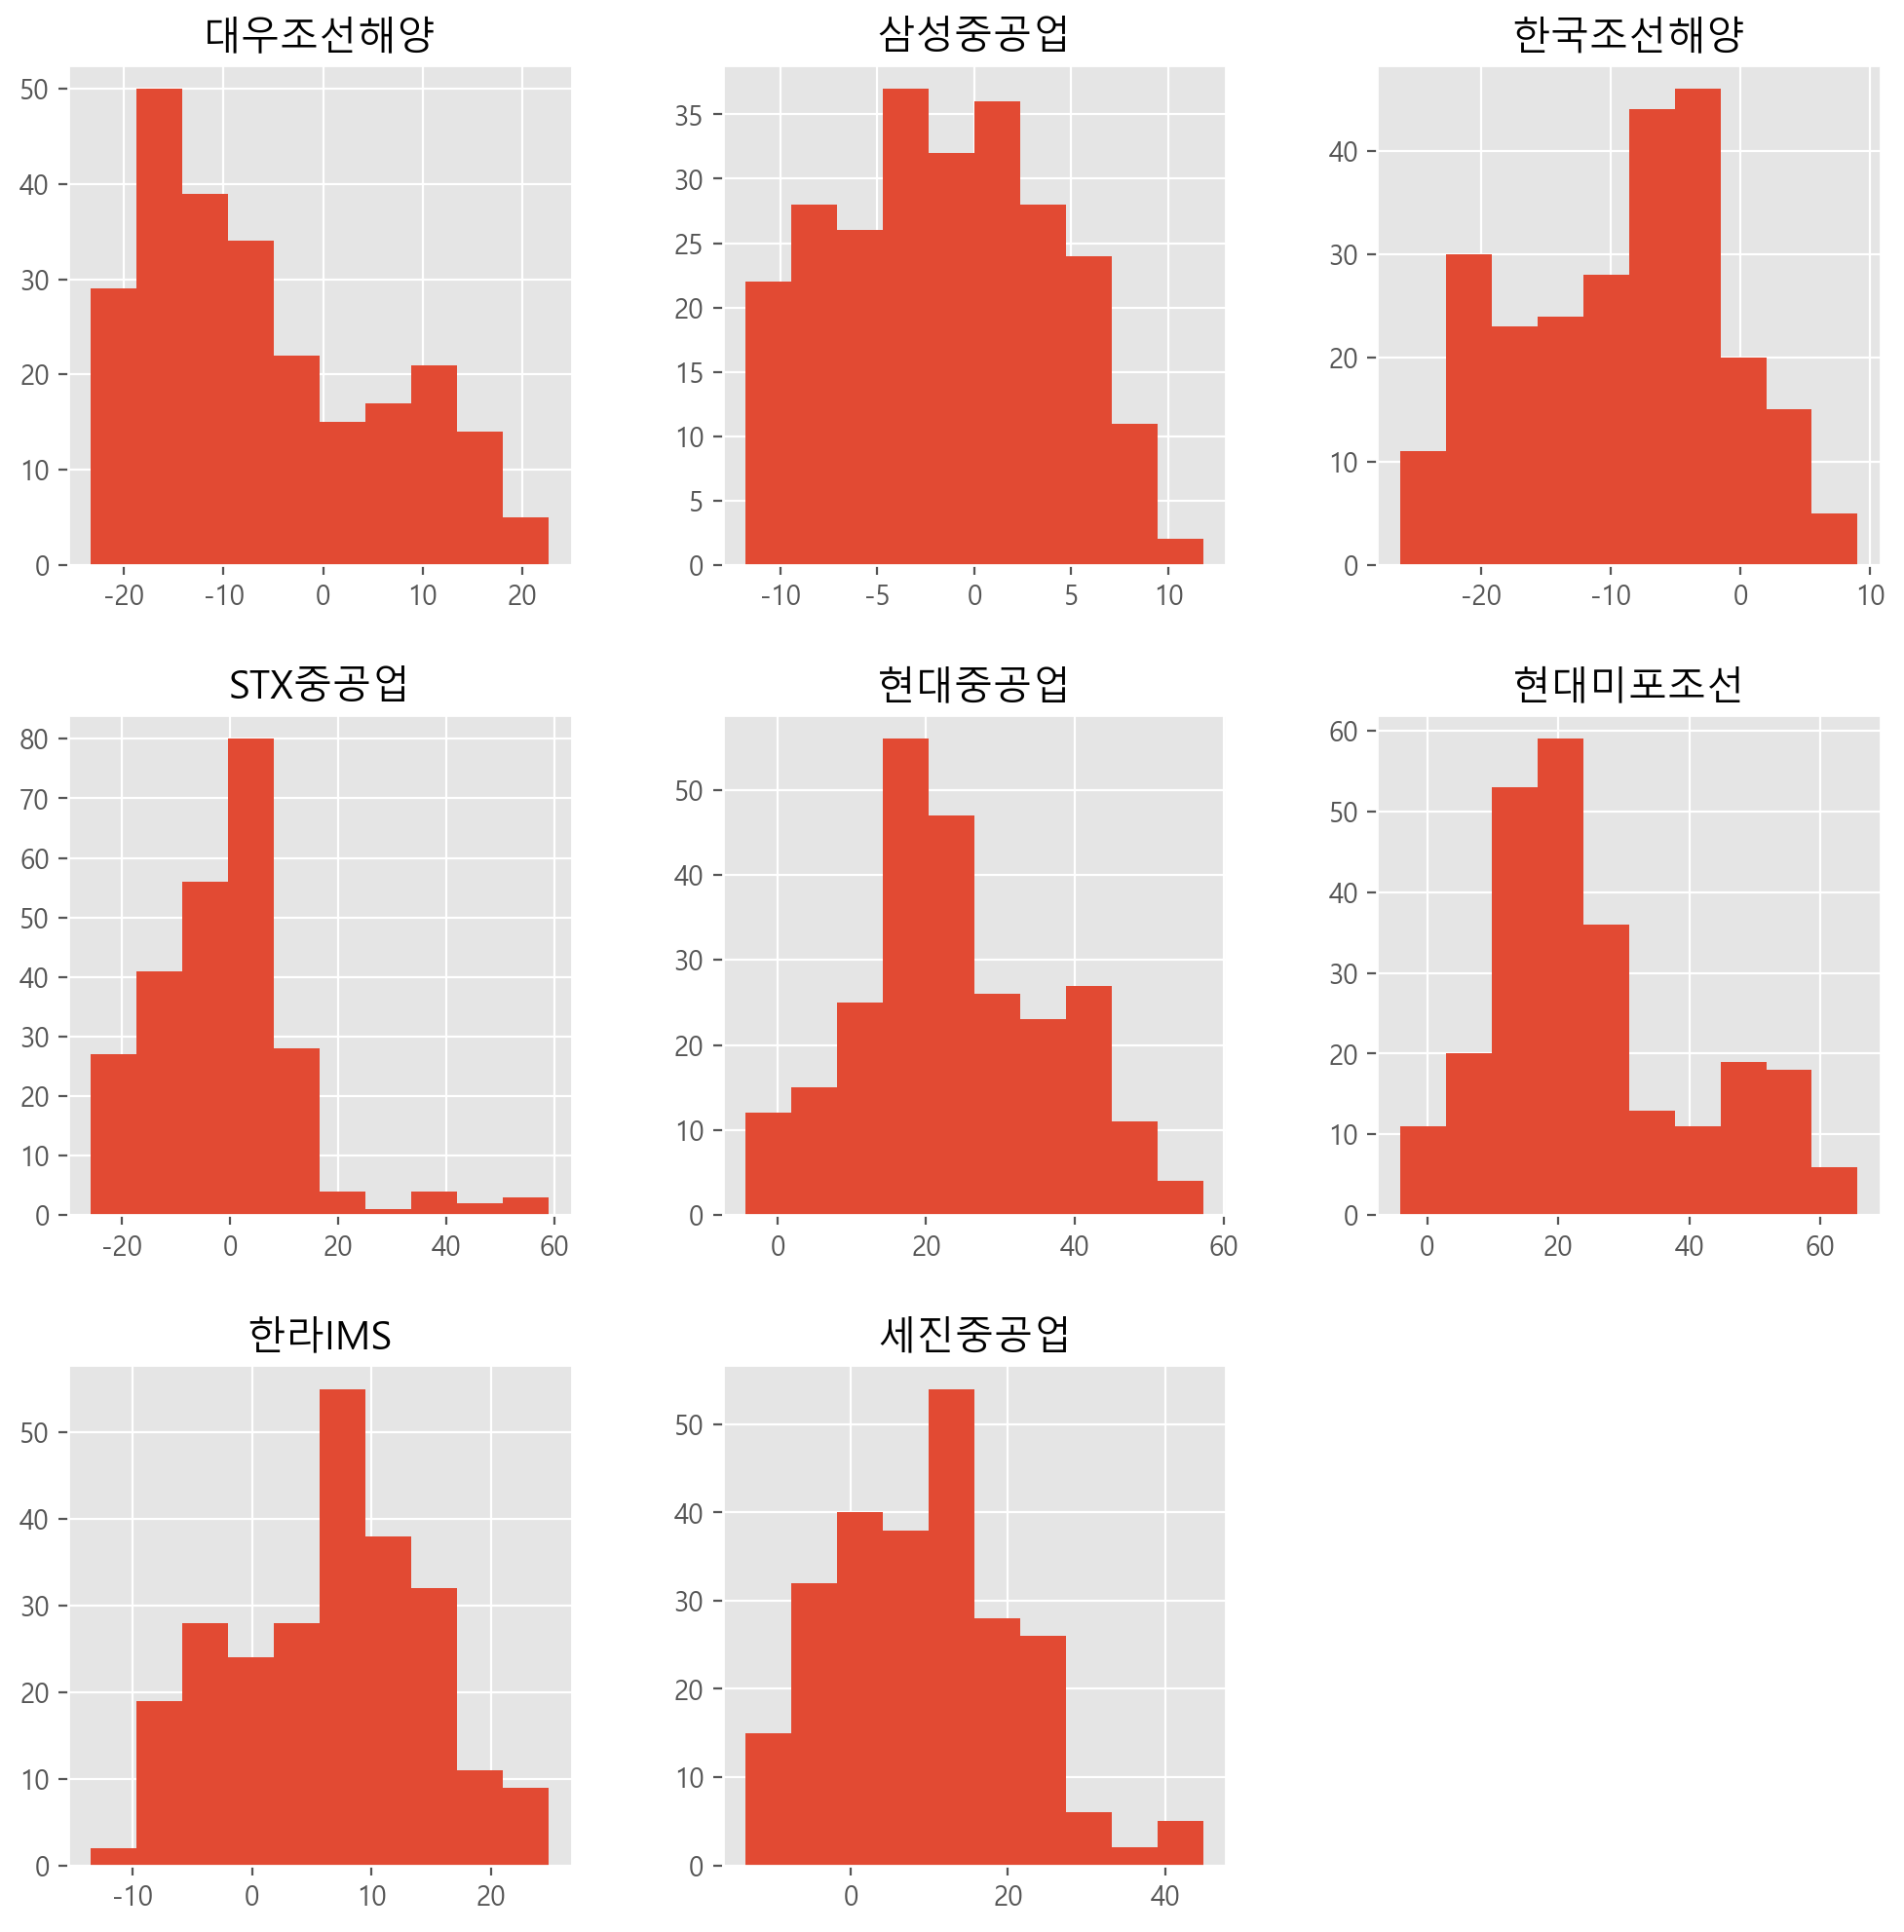

In [23]:
# 수익률에 대한 히스토그램 그리기
h = df_norm.hist(figsize=(12, 12))

In [24]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew()

대우조선해양    0.593893
삼성중공업     0.104031
한국조선해양   -0.145079
STX중공업    1.349299
현대중공업     0.231689
현대미포조선    0.691101
한라IMS    -0.092427
세진중공업     0.401221
dtype: float64

In [25]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

대우조선해양   -0.795239
삼성중공업    -0.901967
한국조선해양   -0.875282
STX중공업    3.871345
현대중공업    -0.537113
현대미포조선   -0.321069
한라IMS    -0.605227
세진중공업    -0.017840
dtype: float64